In [1]:
import pandas as pd
import numpy as np

In [2]:
import requests
from pandas.io.json import json_normalize

In [3]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans



In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
! pip install geocoder
import geocoder


In [7]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ashishjindal94/Battle-of-neighbourhoods/master/zomato.csv' ,encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18287358,Food Cloud,1,New Delhi,"Aaya Nagar, New Delhi",Aaya Nagar,"Aaya Nagar, New Delhi",0.000000,0.000000,Cuisine Varies,...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,2
1,18216944,Burger.in,1,New Delhi,"84, Near Honda Showroom, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.196923,28.535382,Fast Food,...,Indian Rupees(Rs.),No,Yes,No,No,1,3.2,Orange,Average,46
2,313333,Days of the Raj,1,New Delhi,"81/3, 1st Floor, Qutub Residency, Adchini, New...",Adchini,"Adchini, New Delhi",77.197475,28.535493,"North Indian, Seafood, Continental",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.4,Orange,Average,45
3,18384127,Dilli Ka Dhaba,1,New Delhi,"66 A, Ground Floor, Sri Aurobindo Marg, Adchin...",Adchini,"Adchini, New Delhi",77.198033,28.537547,"South Indian, North Indian",...,Indian Rupees(Rs.),No,No,No,No,2,2.6,Orange,Average,11
4,582,Govardhan,1,New Delhi,"84, Adjacent Hero Motor Bike Showroom, Main Me...",Adchini,"Adchini, New Delhi",77.196924,28.535523,"South Indian, North Indian, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,2,3.4,Orange,Average,238


In [9]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [12]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

df_Res.head()


,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
1,Burger.in,Adchini,77.196923,28.535382,Fast Food,3.2,Average,46
2,Days of the Raj,Adchini,77.197475,28.535493,"North Indian, Seafood, Continental",3.4,Average,45
3,Dilli Ka Dhaba,Adchini,77.198033,28.537547,"South Indian, North Indian",2.6,Average,11
4,Govardhan,Adchini,77.196924,28.535523,"South Indian, North Indian, Chinese",3.4,Average,238
5,Mezbaan Grills,Adchini,77.198122,28.538134,Mughlai,3.1,Average,8


In [ ]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)
X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest


In [14]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
1,Burger.in,Adchini,77.196923,28.535382,Fast Food,3.2,Average,46
2,Days of the Raj,Adchini,77.197475,28.535493,"North Indian, Seafood, Continental",3.4,Average,45
3,Dilli Ka Dhaba,Adchini,77.198033,28.537547,"South Indian, North Indian",2.6,Average,11
4,Govardhan,Adchini,77.196924,28.535523,"South Indian, North Indian, Chinese",3.4,Average,238
5,Mezbaan Grills,Adchini,77.198122,28.538134,Mughlai,3.1,Average,8


In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

<Figure size 900x500 with 1 Axes>

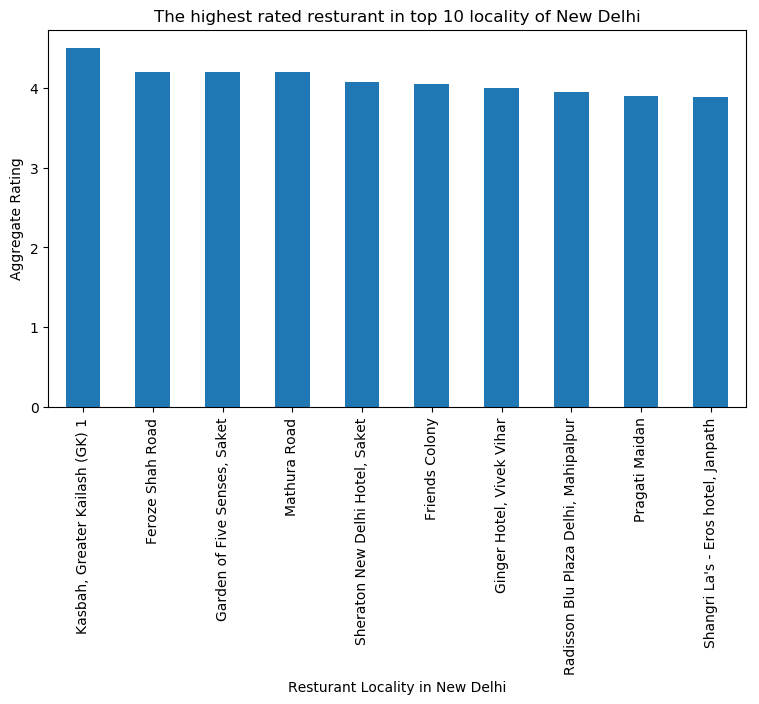

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

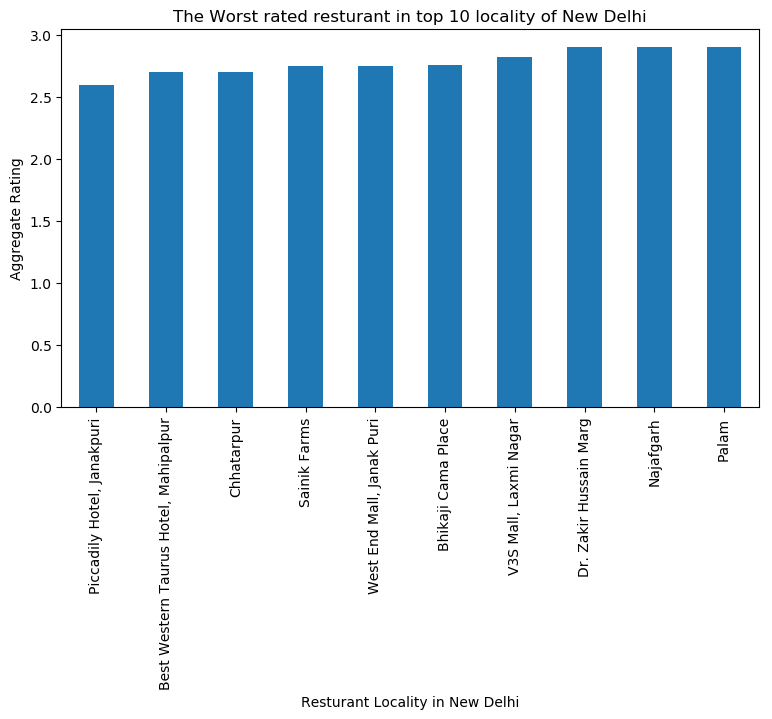

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()


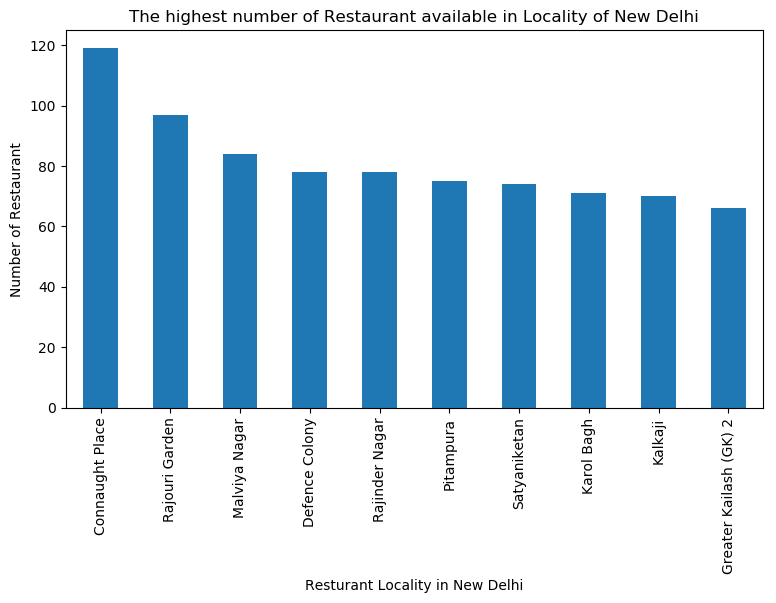

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

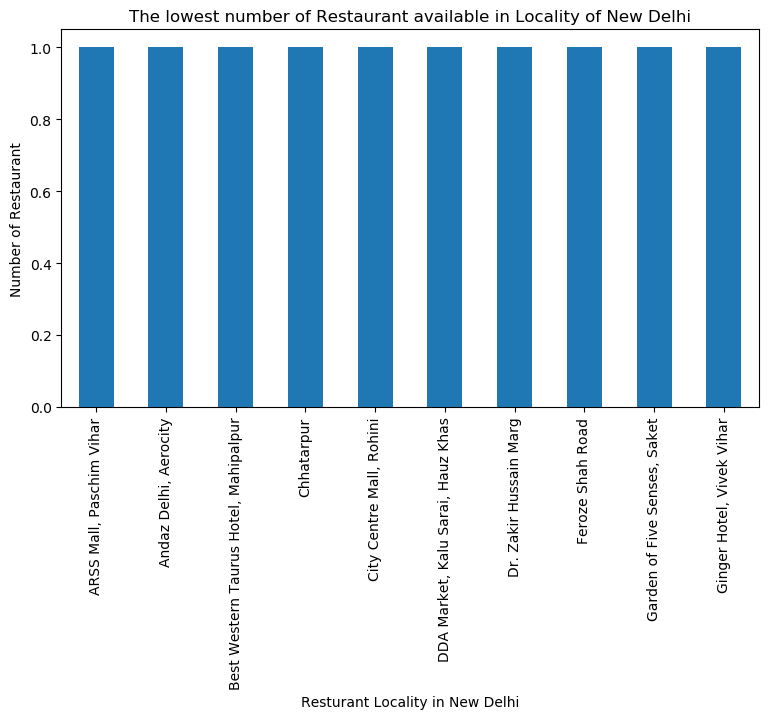

In [19]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

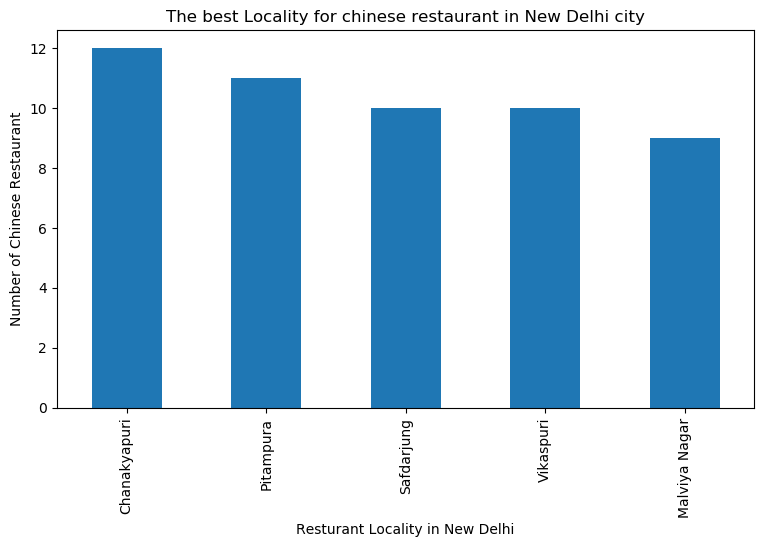

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()


In [21]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()

df_Res_Loc.head()

,Restaurant Name
Locality,
"ARSS Mall, Paschim Vihar",1
Adchini,13
"Aditya Mega Mall, Karkardooma",4
Aerocity,2
"Aggarwal City Mall, Pitampura",3


In [22]:
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lat.head()


,Latitude
Locality,
"ARSS Mall, Paschim Vihar",28.668945
Adchini,28.537063
"Aditya Mega Mall, Karkardooma",28.656131
Aerocity,28.553077
"Aggarwal City Mall, Pitampura",28.690020


In [23]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')


In [24]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"ARSS Mall, Paschim Vihar",28.668945,77.101544,1,"North Indian, South Indian, Chinese, Mithai, F...",3.100000,Average,117
1,Adchini,28.537063,77.197808,13,"Fast Food, North Indian, Seafood, Continental,...",3.292308,"Average, Good, Poor, Very Good",1560
2,"Aditya Mega Mall, Karkardooma",28.656131,77.301266,4,"Finger Food, North Indian, Mughlai, Pizza, Fas...",3.275000,"Average, Good",434
3,Aerocity,28.553077,77.104270,2,"Fast Food, Italian, Pizza, North Indian, Conti...",3.200000,Average,59
4,"Aggarwal City Mall, Pitampura",28.690020,77.134650,3,"North Indian, Chinese, Street Food, Mithai, No...",3.033333,Average,126


In [25]:
df_final.shape


(240, 8)


#  Conclusion:- 
##### Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine.\ Pancsheel park, Nehru place have the best Chinese Resturant.\ Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.